## Objectif: 

L'objectif dans ce concours est de prédire si une personne sera en défaut sur un prêt dans l'ensemble de données test.csv. Vous recevrez deux ensembles de données: train.csv (contient les fonctionnalités et Credit Default comme cible) et test.csv (fonctionnalités uniquement).



# Nettotage des données 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')

print(df.head())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 7500 non-null   float64
 3   Years in current job          7500 non-null   int64  
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  7500 non-null   float64
 10  Bankruptcies                  7500 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [14]:
import skimpy as sp

stats = sp.skim(df)  # Obtenir les statistiques
print(stats)  # Afficher les statistiques

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7500   │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 18     │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0     ┃ p25    ┃ p50     ┃ p75     ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Id           │  0 │    0 │     3750 │     2165 │      0 │   1875 │    3750 │    5624 │       7499 │ ▇▇▇▇▇▇ │  │
│ │ Annual       │  0 │    0 │  1325000 │   756800 │ 164600 │ 931100 │ 1168000 │ 1500000 │   10150000 │   ▇▁   │  │
│ │ Income       │    │      │          │          │        │        │         │         │            │        │  │
│ │ Years in     │  0 │    0 │    4.017 │    3.275 │      0 │      1 │       3 │       7 │         11 │ ▇▃▃▃▂▂ │  │
│ │ current job  │    │      │          │          │        │        │         │         │            │        │  │
│ │ Tax Liens    │  0 │    0 │  0.03013 │   0.2716 │      0 │      0 │       0 │       0 │          7 │   ▇    │  │
│ │ Number of    │  0 │    0 │    11.13 │    4.909 │      2 │      8 │      10 │      14 │         43 │  ▅▇▂   │  │
│ │ Open         │    │      │          │          │        │        │         │         │            │        │  │
│ │ Accounts     │    │      │          │          │        │        │         │         │            │        │  │
│ │ Years of     │  0 │    0 │    18.32 │    7.042 │      4 │   13.5 │      17 │    21.8 │       57.7 │  ▃▇▃▁  │  │
│ │ Credit       │    │      │          │          │        │        │         │         │            │        │  │
│ │ History      │    │      │          │          │        │        │         │         │            │        │  │
│ │ Maximum Open │  0 │    0 │   945200 │ 16030000 │      0 │ 279200 │  478200 │  793500 │ 1305000000 │   ▇    │  │
│ │ Credit       │    │      │          │          │        │        │         │         │            │        │  │
│ │ Number of    │  0 │    0 │     0.17 │   0.4986 │      0 │      0 │       0 │       0 │          7 │   ▇    │  │
│ │ Credit       │    │      │          │          │        │        │         │         │            │        │  │
│ │ Problems     │    │      │          │          │        │        │         │         │            │        │  │
│ │ Months since │  0 │    0 │    15.82 │    22.65 │      0 │      0 │       0 │      29 │        118 │  ▇▂▁▁  │  │
│ │ last         │    │      │          │          │        │        │         │         │            │        │  │
│ │ delinquent   │    │      │          │          │        │        │         │         │            │        │  │
│ │ Bankruptcies │  0 │    0 │   0.1169 │   0.3469 │      0 │      0 │       0 │       0 │          4 │   ▇▁   │  │
│ │ Current Loan │  0 │    0 │ 11870000 │ 31930000 │  11

None


In [5]:
#Gestion des valeurs manquantes
df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)

df['Years in current job'].fillna('Unknown', inplace=True) #Il s'agit d'une colonne catégorielle. Vous pouvez imputer une valeur comme "Unknown"

df['Months since last delinquent'].fillna(0, inplace=True) #remplir avec une valeur comme 0

df['Bankruptcies'].fillna(0, inplace=True) #hypothèse que les données manquantes signifient qu'il n'y a pas eu de faillite

# Remplacer les valeurs manquantes par la médiane
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)


In [6]:
print(df.isnull().sum()) #Colonnes avec des valeurs manquantes 

Id                              0
Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
dtype: int64


In [7]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation sur les colonnes numériques
correlation_matrix = numeric_columns.corr()

# Afficher les corrélations spécifiques avec la variable 'Credit Score'
print(correlation_matrix['Credit Score'].sort_values(ascending=False))




Credit Score                    1.000000
Credit Default                  0.376220
Id                              0.033870
Number of Open Accounts         0.013952
Tax Liens                       0.008544
Monthly Debt                   -0.000489
Months since last delinquent   -0.000719
Current Credit Balance         -0.004781
Maximum Open Credit            -0.005160
Years of Credit History        -0.014030
Number of Credit Problems      -0.016497
Bankruptcies                   -0.024435
Annual Income                  -0.024780
Current Loan Amount            -0.083934
Name: Credit Score, dtype: float64


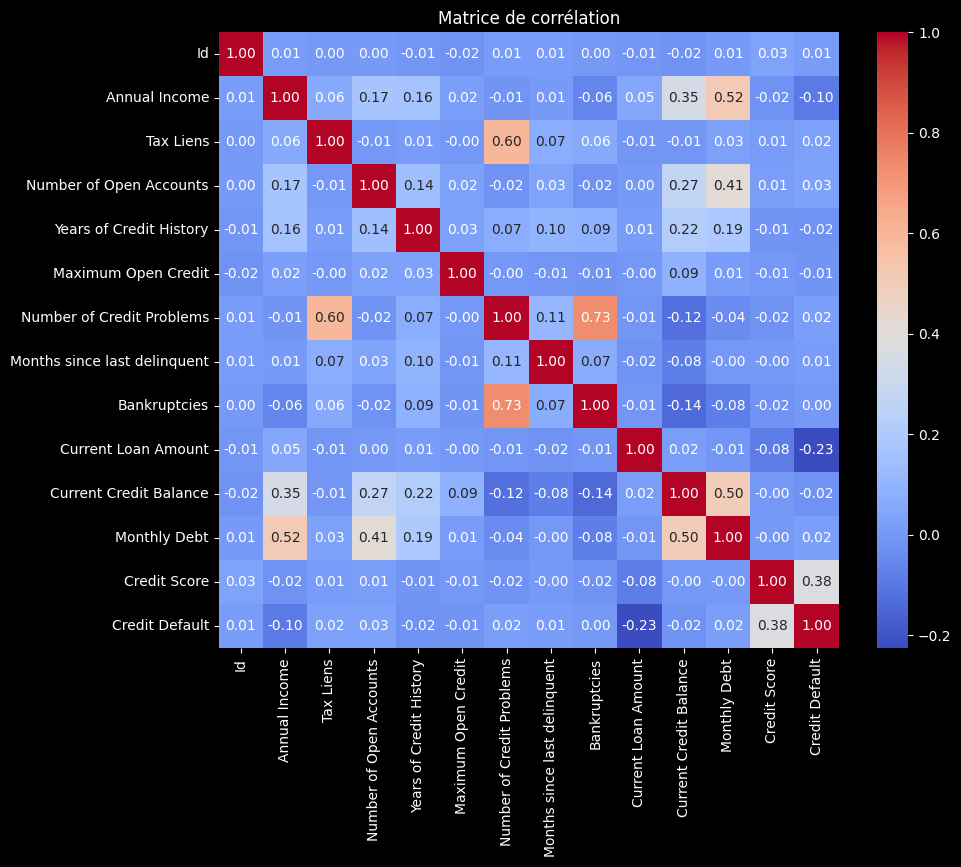

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()


## Intrepretation:

On note une très faible correlation linéaire entre le Credit Score et les autre variables quantitative, par conséquent nous allons utiliser l'option Imputation par la médiane pour completer les données manquante. 

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encodage des colonnes catégorielles avec LabelEncoder
le = LabelEncoder()
df['Years in current job'] = le.fit_transform(df['Years in current job'].astype(str))

# Utilisation du One-Hot Encoding pour les autres variables catégorielles
df_encoded = pd.get_dummies(df, columns=['Home Ownership', 'Purpose', 'Term'])

# Vérification des types de colonnes
print(df_encoded.dtypes)

# Calcul de la matrice de corrélation après encodage
correlation_matrix_encoded = df_encoded.corr()

# Afficher les corrélations spécifiques avec 'Credit Score'
print(correlation_matrix_encoded['Credit Score'].sort_values(ascending=False))


Id                                int64
Annual Income                   float64
Years in current job              int64
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
Home Ownership_Have Mortgage       bool
Home Ownership_Home Mortgage       bool
Home Ownership_Own Home            bool
Home Ownership_Rent                bool
Purpose_business loan              bool
Purpose_buy a car                  bool
Purpose_buy house                  bool
Purpose_debt consolidation         bool
Purpose_educational expenses       bool
Purpose_home improvements          bool


In [12]:
print(df.head())
df.info()

   Id Home Ownership  Annual Income  Years in current job  Tax Liens  \
0   0       Own Home       482087.0                     3        0.0   
1   1       Own Home      1025487.0                     1        0.0   
2   2  Home Mortgage       751412.0                    10        0.0   
3   3       Own Home       805068.0                     8        0.0   
4   4           Rent       776264.0                    10        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0      

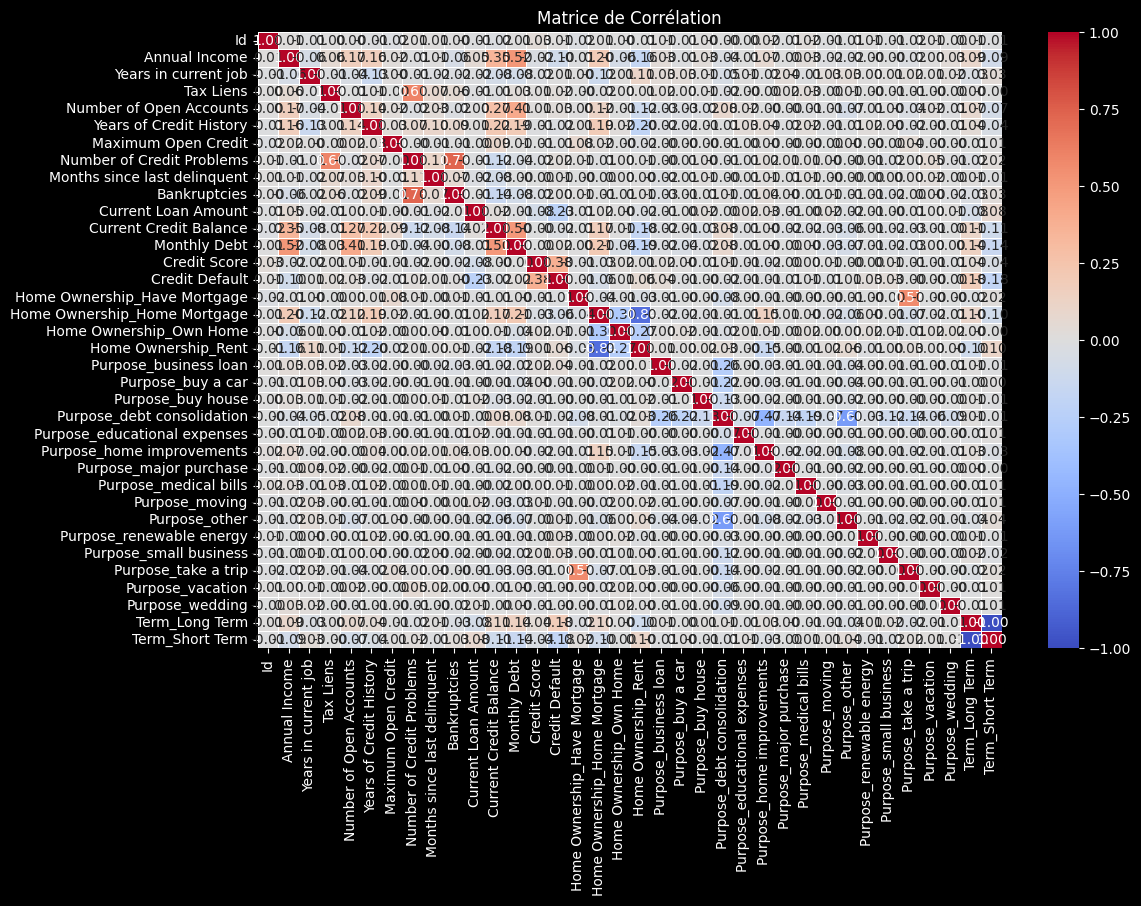

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Générer une heatmap de la matrice de corrélation
plt.figure(figsize=(12, 8))  # Taille de l'image
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Afficher la matrice de corrélation
plt.title("Matrice de Corrélation")
plt.show()


In [ ]:
print(sp.skim(df))  # Résumé des statistiques avec skimpy

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7500   │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 18     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0     ┃ p25    ┃ p50     ┃ p75     ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Id           │  0 │    0 │     3750 │     2165 │      0 │   1875 │    3750 │    5624 │       7499 │ ▇▇▇▇▇▇ │  │
│ │ Annual       │  0 │    0 │  1325000 │   756800 │ 164600 │ 931100 │ 1168000 │ 1500000 │   10150000 │   ▇▁   │  │
│ │ Income       │    │      │          │          │        │        │         │         │            │        │  │
│ │ Tax Liens    │  0 │    0 │  0.03013 │   0.2716 │      0 │      0 │       0 │       0 │          7 │   ▇    │  │
│ │ Number of    │  0 │    0 │    11.13 │    4.909 │      2 │      8 │      10 │      14 │         43 │  ▅▇▂   │  │
│ │ Open         │    │      │          │          │        │        │         │         │            │        │  │
│ │ Accounts     │    │      │          │          │        │        │         │         │            │        │  │
│ │ Years of     │  0 │    0 │    18.32 │    7.042 │      4 │   13.5 │      17 │    21.8 │       57.7 │  ▃▇▃▁  │  │
│ │ Credit       │    │      │          │          │        │        │         │         │            │        │  │
│ │ History      │    │      │          │          │        │        │         │         │            │        │  │
│ │ Maximum Open │  0 │    0 │   945200 │ 16030000 │      0 │ 279200 │  478200 │  793500 │ 1305000000 │   ▇    │  │
│ │ Credit       │    │      │          │          │        │        │         │         │            │        │  │
│ │ Number of    │  0 │    0 │     0.17 │   0.4986 │      0 │      0 │       0 │       0 │          7 │   ▇    │  │
│ │ Credit       │    │      │          │          │        │        │         │         │            │        │  │
│ │ Problems     │    │      │          │          │        │        │         │         │            │        │  │
│ │ Months since │  0 │    0 │    15.82 │    22.65 │      0 │      0 │       0 │      29 │        118 │  ▇▂▁▁  │  │
│ │ last         │    │      │          │          │        │        │         │         │            │        │  │
│ │ delinquent   │    │      │          │          │        │        │         │         │            │        │  │
│ │ Bankruptcies │  0 │    0 │   0.1169 │   0.3469 │      0 │      0 │       0 │       0 │          4 │   ▇▁   │  │
│ │ Current Loan │  0 │    0 │ 11870000 │ 31930000 │  11240 │ 180200 │  309600 │  519900 │  100000000 │ ▇    ▁ │  │
│ │ Amount       │    │      │          │          │        │        │         │         │            │        │  │
│ │ Current      │  0 │    0 │   289800 │   317900 │    

None


In [ ]:
print(df.head())


   Id Home Ownership  Annual Income Years in current job  Tax Liens  \
0   0       Own Home       482087.0              Unknown        0.0   
1   1       Own Home      1025487.0            10+ years        0.0   
2   2  Home Mortgage       751412.0              8 years        0.0   
3   3       Own Home       805068.0              6 years        0.0   
4   4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0            

# Analyse